<a href="https://colab.research.google.com/github/mmastin/DS-Unit-2-Regression-1/blob/master/Mastin_2_1_1_Making_Forecasts_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving giannis.csv to giannis.csv


{'giannis.csv': b'Date,"Giannis Antetokounmpo"\n2015-07-01,1265\n2015-07-02,3042\n2015-07-03,3368\n2015-07-04,2133\n2015-07-05,1539\n2015-07-06,4945\n2015-07-07,2160\n2015-07-08,1445\n2015-07-09,1304\n2015-07-10,1515\n2015-07-11,1758\n2015-07-12,1432\n2015-07-13,2175\n2015-07-14,4397\n2015-07-15,1929\n2015-07-16,1894\n2015-07-17,1747\n2015-07-18,3337\n2015-07-19,1337\n2015-07-20,1409\n2015-07-21,1271\n2015-07-22,1023\n2015-07-23,985\n2015-07-24,1058\n2015-07-25,883\n2015-07-26,791\n2015-07-27,853\n2015-07-28,1071\n2015-07-29,1096\n2015-07-30,1406\n2015-07-31,1386\n2015-08-01,6464\n2015-08-02,3817\n2015-08-03,1855\n2015-08-04,1350\n2015-08-05,1540\n2015-08-06,1735\n2015-08-07,1427\n2015-08-08,1638\n2015-08-09,1323\n2015-08-10,1082\n2015-08-11,991\n2015-08-12,931\n2015-08-13,745\n2015-08-14,910\n2015-08-15,969\n2015-08-16,786\n2015-08-17,839\n2015-08-18,859\n2015-08-19,1021\n2015-08-20,936\n2015-08-21,874\n2015-08-22,972\n2015-08-23,834\n2015-08-24,1041\n2015-08-25,765\n2015-08-26,672\n2

In [2]:
import pandas as pd
df = pd.read_csv('giannis.csv')
print(df.shape)
df.head()

(1423, 2)


,Date,Giannis Antetokounmpo
0,2015-07-01,1265
1,2015-07-02,3042
2,2015-07-03,3368
3,2015-07-04,2133
4,2015-07-05,1539


In [4]:
df.tail()

,Date,Giannis Antetokounmpo
1418,2019-05-19,56610
1419,2019-05-20,73577
1420,2019-05-21,27899
1421,2019-05-22,63078
1422,2019-05-23,27123


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

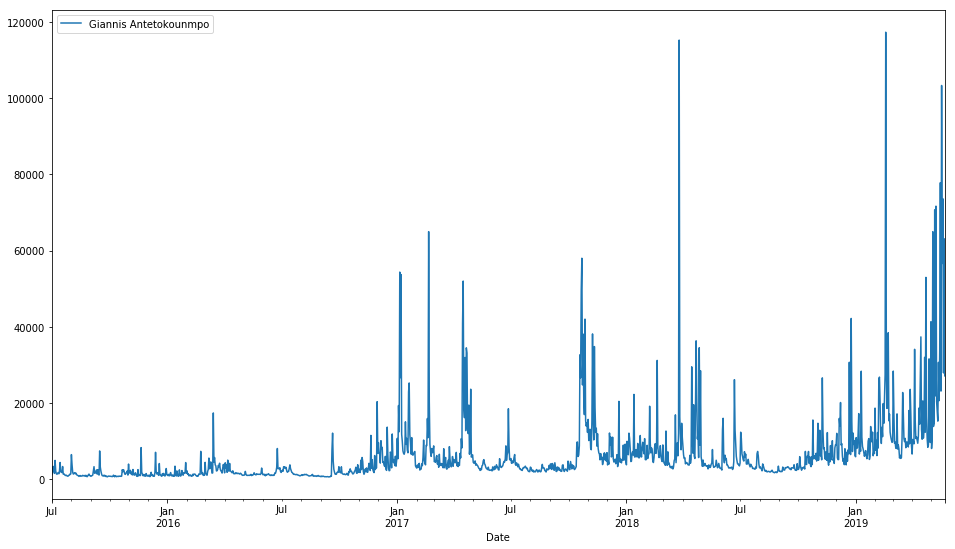

In [7]:
df.plot(figsize=(16,9))

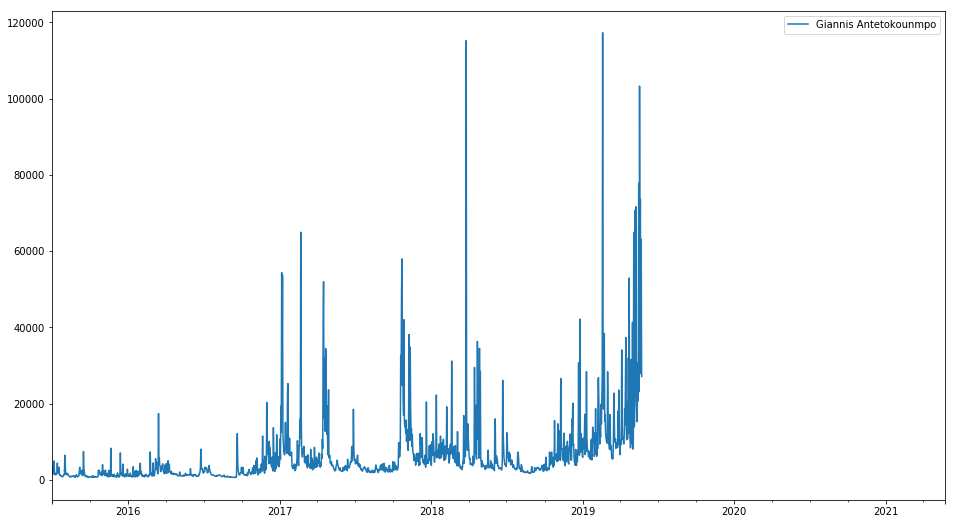

In [11]:
df = df.reindex(pd.date_range(start='2015-07-01', end='2021-05-23'))
df.plot(figsize=(16,9));

In [12]:
df['Giannis Antetokounmpo'].mean()

6234.3527758257205

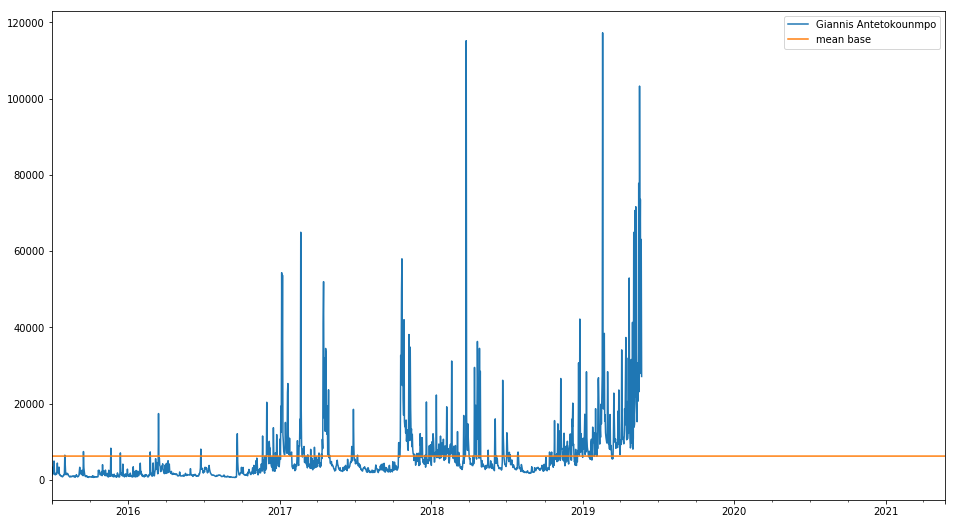

In [13]:
df['mean base'] = df['Giannis Antetokounmpo'].mean()
df.plot(figsize=(16,9))

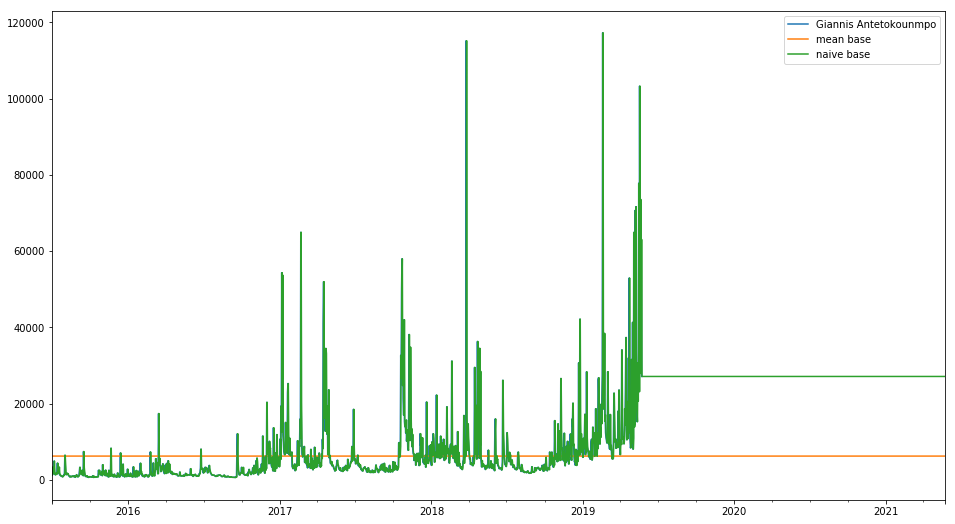

In [14]:
df['naive base'] = df['Giannis Antetokounmpo'].shift(1).ffill()
df.plot(figsize=(16,9))

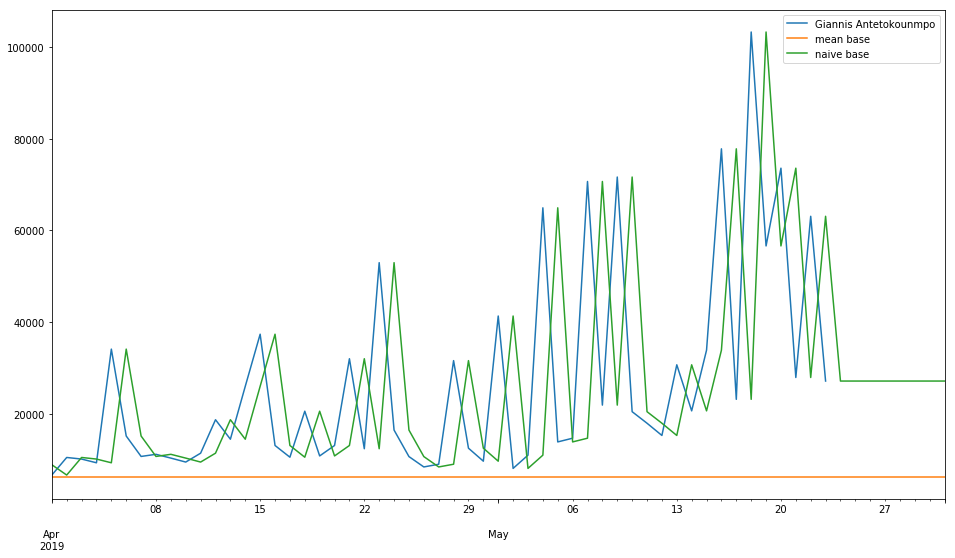

In [15]:
df['2019-04': '2019-05'].plot(figsize=(16,9))

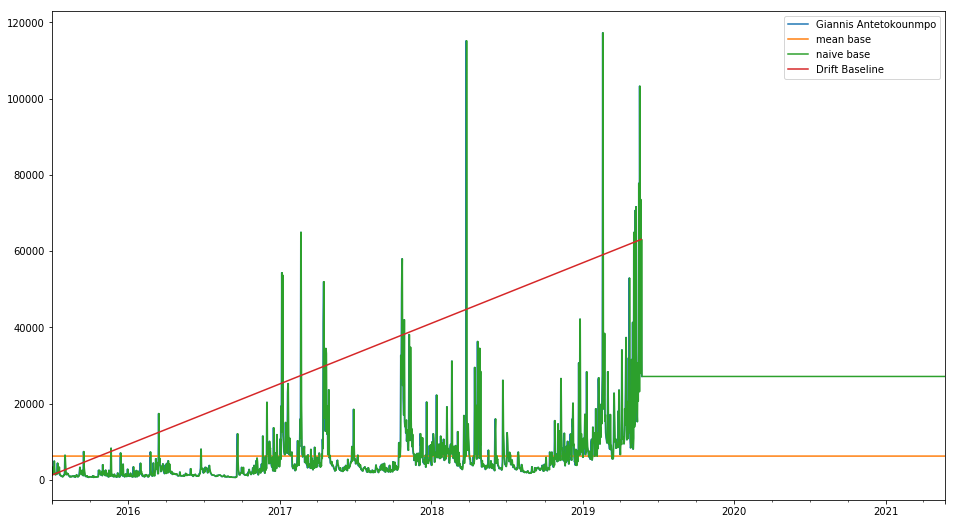

In [17]:
import numpy as np
df['Drift Baseline'] = np.nan
df.loc['2015-07-01', 'Drift Baseline'] = df.loc['2015-07-01', 'Giannis Antetokounmpo']
df.loc['2019-05-22', 'Drift Baseline'] = df.loc['2019-05-22', 'Giannis Antetokounmpo']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));

In [0]:
df = df.reset_index().rename(columns = {'index': 'ds', 'Giannis Antetokounmpo': 'y'})

In [19]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2514,2022-05-19
2515,2022-05-20
2516,2022-05-21
2517,2022-05-22
2518,2022-05-23


In [0]:
forecast = m.predict(future)

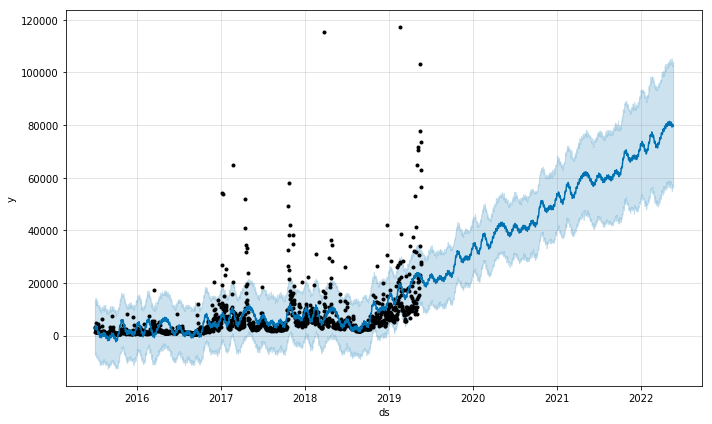

In [22]:
fig.title = 
fig1 = m.plot(forecast)

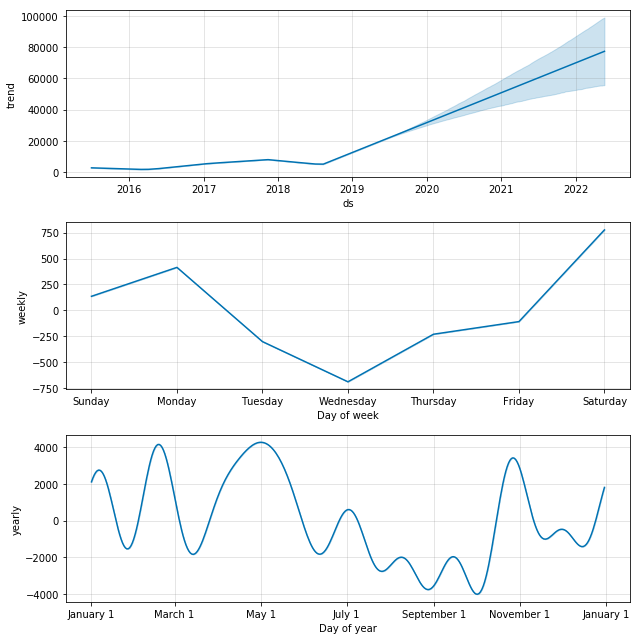

In [23]:
fig2 = m.plot_components(forecast)